<a href="https://colab.research.google.com/github/SwethaR1505/prodigy_2/blob/main/heart_attack_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as ss

print('Libraries are imported')


Libraries are imported


**Setting Params**

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_palette('deep')
sns.set_color_codes()
sns.set_style('dark')

print('Parameters are set')


Parameters are set


**Loading Data**

In [ ]:
df = pd.read_csv('/content/heart.csv')
print('Data is Loaded')

Data is Loaded


**Preliminary Analysis**

In [ ]:
print(f'Shape of the Dataset is: {df.shape}')

Shape of the Dataset is: (303, 14)


**Preview of the dataset**

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**General Stats**

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 302 ,and number of columns are : 14


**Missing Values**

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [ ]:
df.isnull().interpolate()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().apply(pd.value_counts, axis=0)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
False,303,303,303,303,303,303,303,303,303,303,303,303,303,303


# **Exploratory Data Analysis**

In [ ]:
over_30 = df[df["age"]>30]
over_30.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


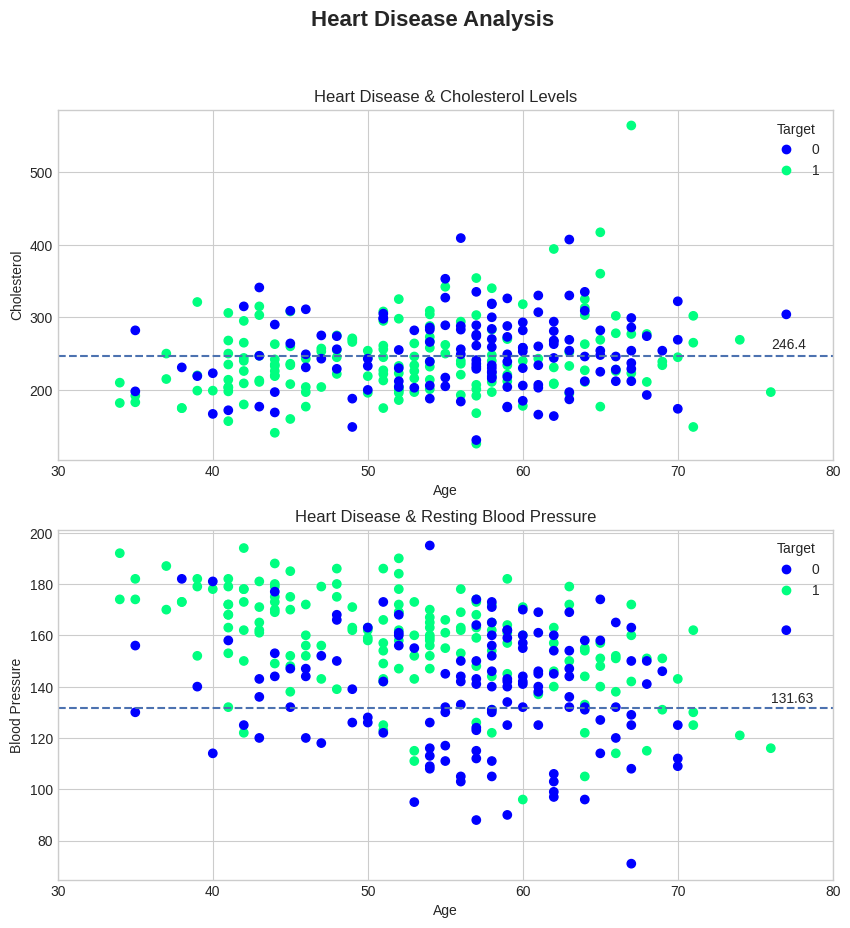

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10))

# Add data to ax0
scatter = ax0.scatter(x=over_30["age"],
                      y=over_30["chol"],
                      c=over_30["output"],
                      cmap="winter") # change plot (matplotlib.org)

# Customize ax0
ax0.set(title="Heart Disease & Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol")

ax0.set_xlim([30, 80]) # Change x axis limit

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax0.axhline(y=over_30["chol"].mean(),
            linestyle="--")

ax0.text(76, over_30["chol"].mean()+10, round(over_30["chol"].mean(),2)) # Add mean value to line

# Add data to ax1
scatter = ax1.scatter(x=over_30["age"],
                      y=over_30["thalachh"],
                      c=over_30["output"],
                      cmap="winter") # change plot (matplotlib.org)

# Customize ax1
ax1.set(title="Heart Disease & Resting Blood Pressure",
        xlabel="Age",
        ylabel="Blood Pressure")

ax1.set_xlim([30, 80]) # Change x axis limit

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a mean line
ax1.axhline(y=over_30["trtbps"].mean(),
            linestyle="--")

ax1.text(76, over_30["trtbps"].mean()+2, round(over_30["trtbps"].mean(),2)) # Add mean value to line

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

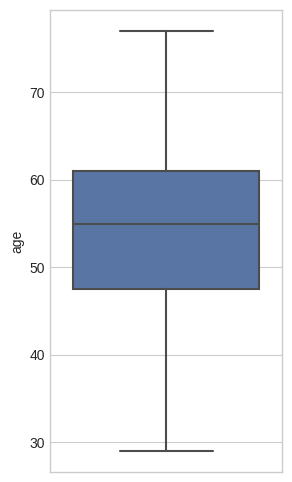

In [ ]:
plt.figure(figsize=(3,6))
sns.boxplot(y='age', data=df,showfliers=False);

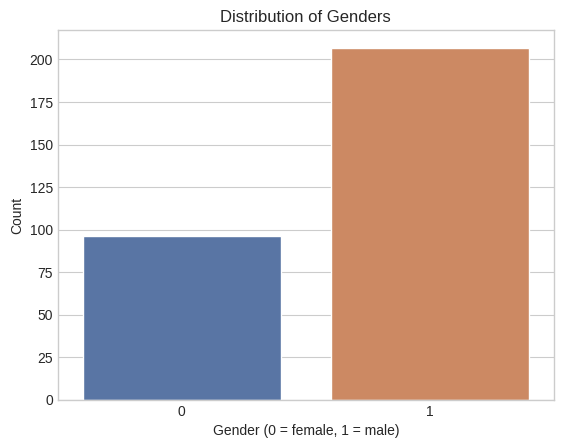

In [ ]:
sns.countplot(x='sex', data=df)
plt.xlabel('Gender (0 = female, 1 = male)')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()


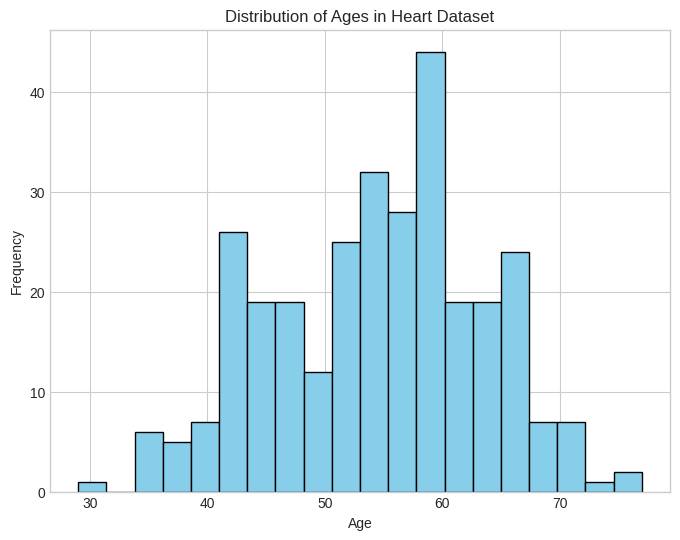

In [ ]:
ages = df['age']


plt.figure(figsize=(8, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages in Heart Dataset')
plt.grid(True)
plt.show()


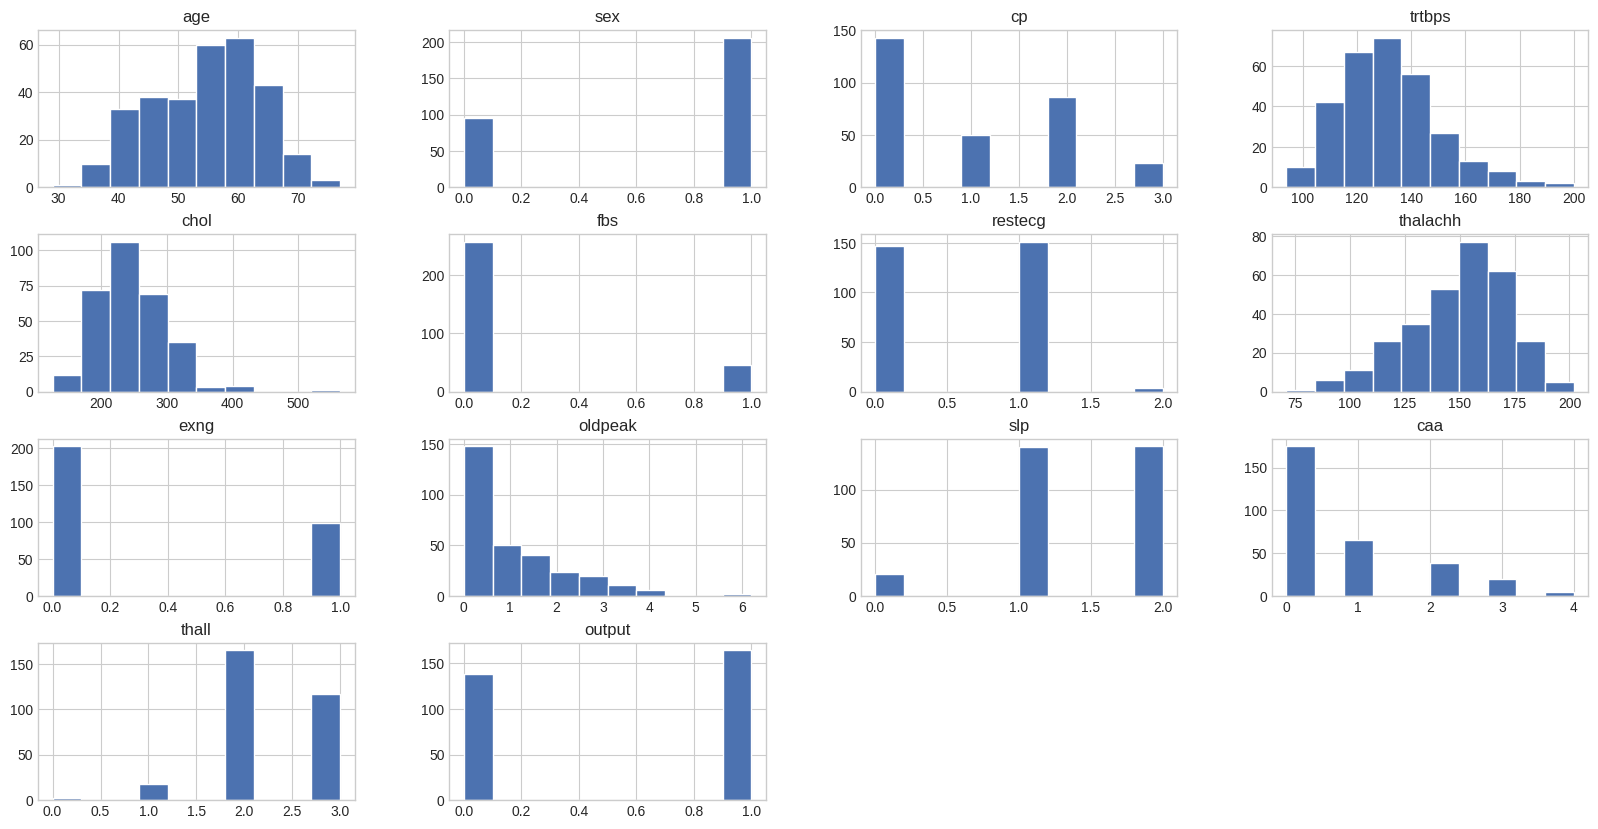

In [ ]:
df.hist(figsize=(20,10))
plt.show()

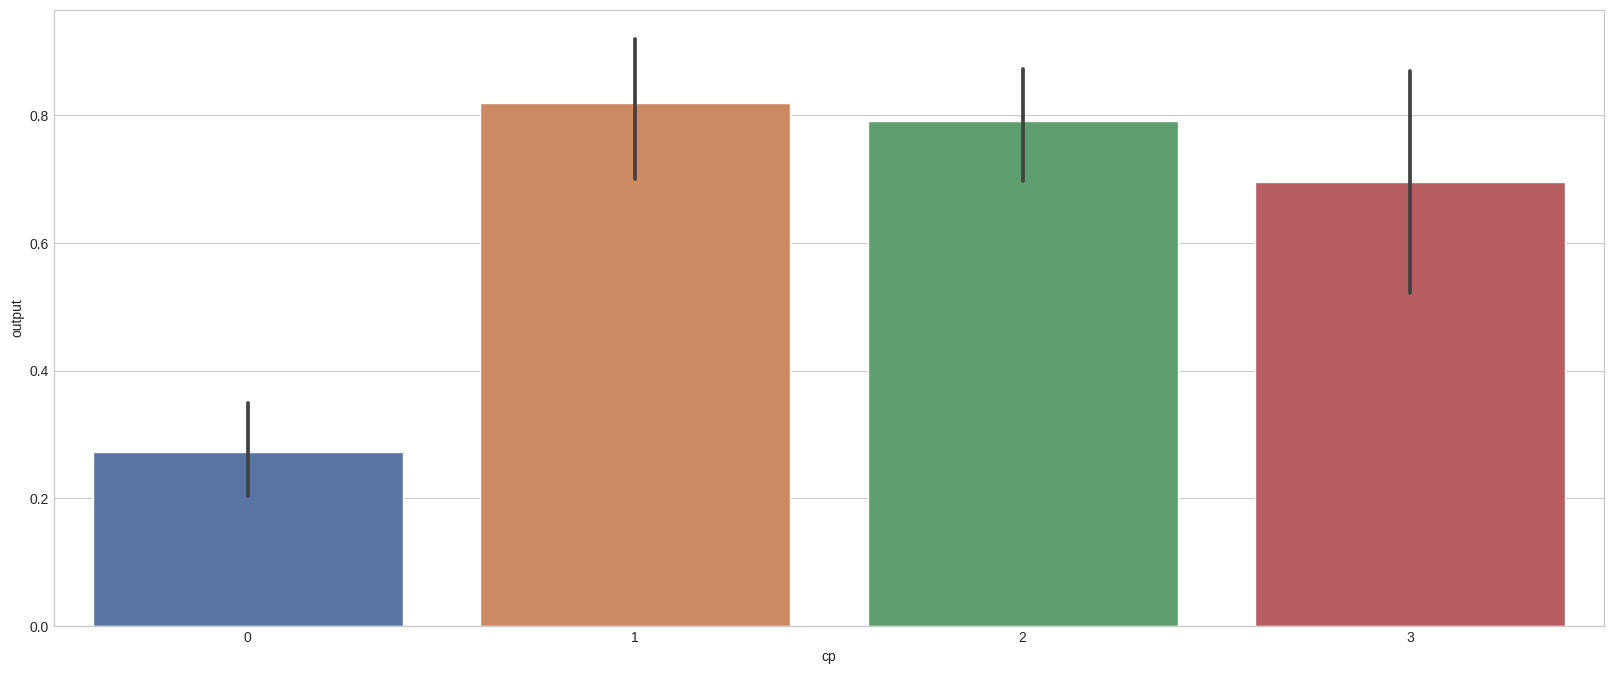

In [ ]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="cp",y="output",data=df)
plt.show()

**Categorical Feature Analysis**

In [ ]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

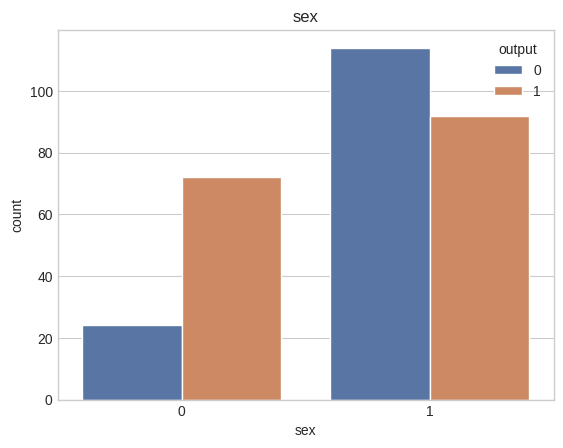

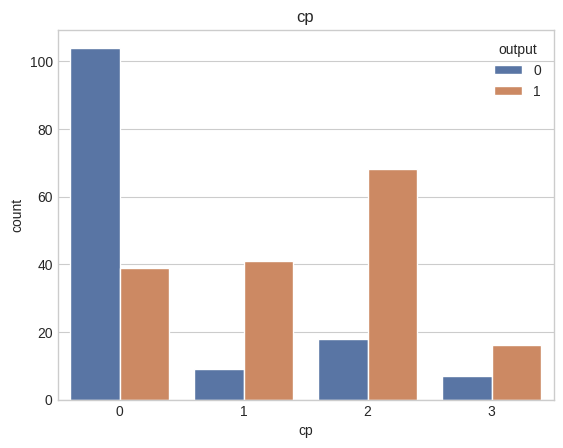

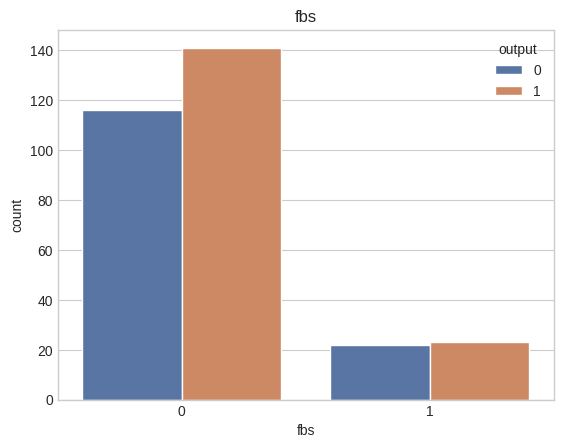

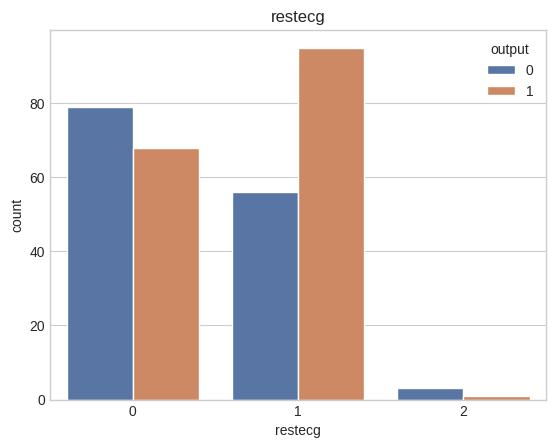

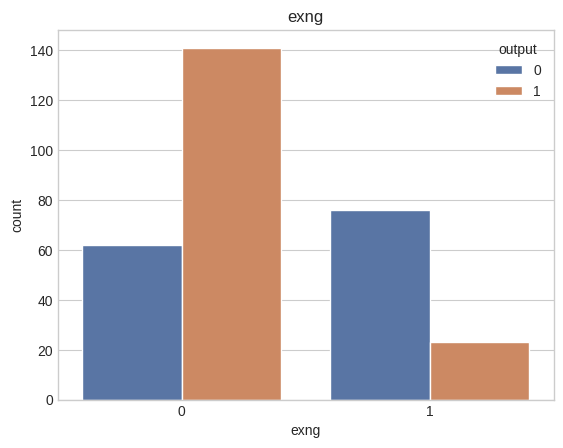

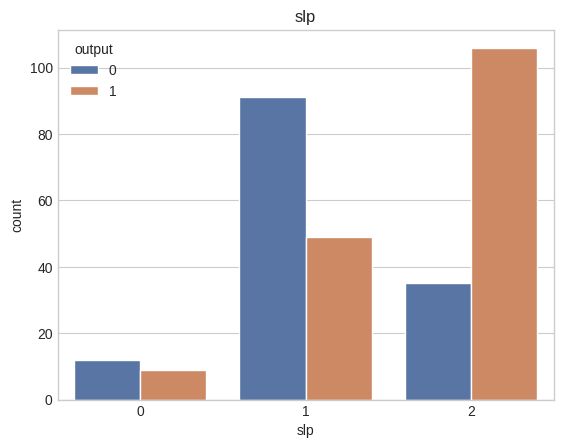

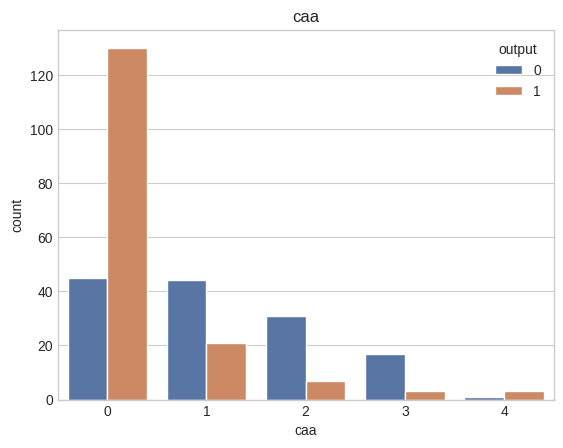

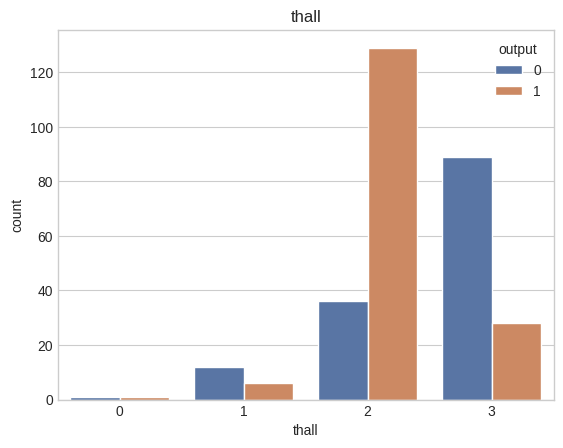

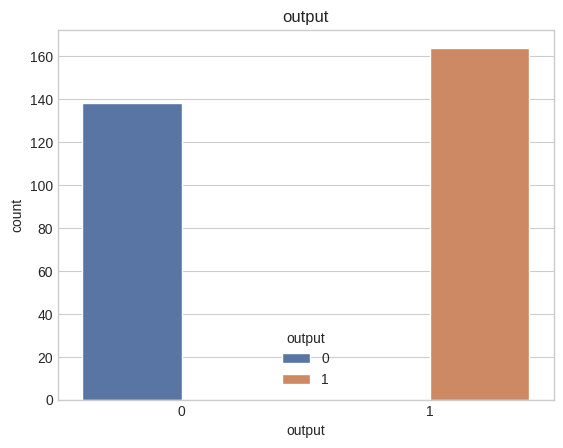

In [ ]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)


**Cat Plot Analysis**

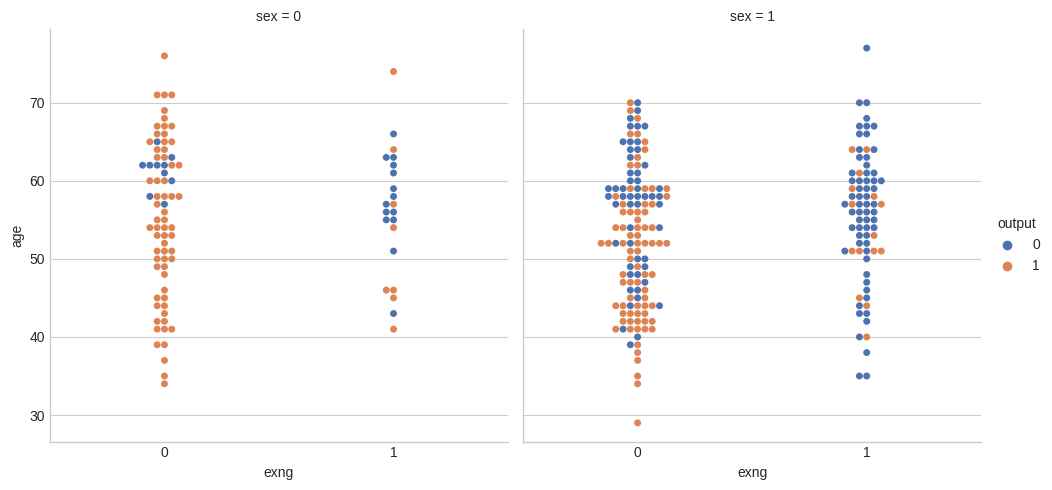

In [ ]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

**Correlation Analysis**

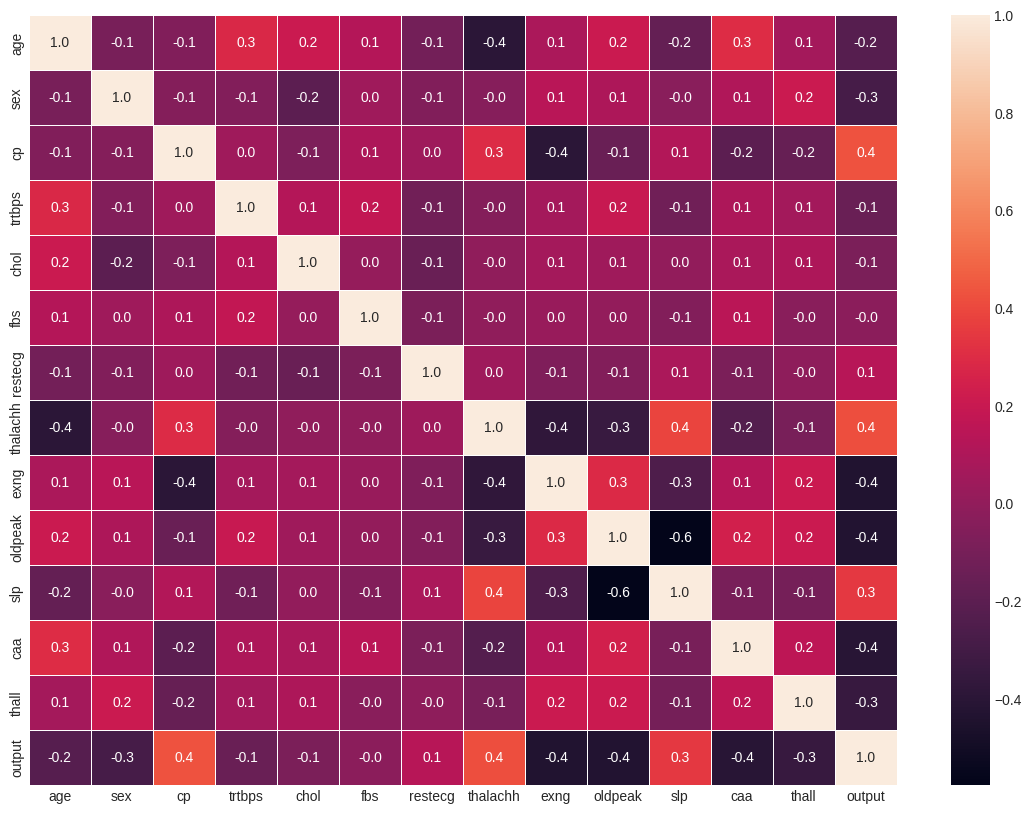

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()